In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Gerando o pavimento 

In [54]:
comprimento = 1000                     # (m)
altura_total = 55/100                 # Altura total do bloco do pavimento (m)
espessura_sub_base = 30/100           # (m)
espessura_base = 20/100               # (m)
espessura_revestimento = 5/100        # (m)

# Amplitudes de variação por camada
variacao_sub_base = 5/1000 
variacao_base = 3/1000  

# Módulos de resistência dos materiais (em MPa)
modulo_revestimento_medio = 4500  # MPa
modulo_base_medio = 250           # MPa
modulo_sub_base_medio = 150       # MPa

# Índice de Irregularidade Internacional (IRI) médio
IRI_medio = 2.5  # m/km

In [56]:
x = np.linspace(0, comprimento, 1000)

# Gerando variações para as camadas de sub-base e base
sub_base_variation = variacao_sub_base * np.sin(2 * np.pi * x / comprimento)
base_variation = variacao_base * np.sin(2 * np.pi * x / (comprimento / 2))

# Definindo as alturas das camadas
topo_revestimento = 0
topo_base = topo_revestimento - espessura_revestimento - base_variation
topo_sub_base = topo_base - espessura_base - sub_base_variation
base_subleito = -altura_total  # Profundidade total fixa

# Gerando variações suaves para os módulos de resistência
modulo_revestimento = modulo_revestimento_medio + 200 * np.sin(2 * np.pi * x / comprimento)
modulo_base = modulo_base_medio + 20 * np.sin(2 * np.pi * x / comprimento)
modulo_sub_base = modulo_sub_base_medio + 10 * np.sin(2 * np.pi * x / comprimento)

# Gerando variações suaves para o IRI
IRI = IRI_medio + 0.5 * np.sin(2 * np.pi * x / comprimento)

# Salvando todas as informações em um dicionário
pavimento = {
    'comprimento': x,
    'camadas': {
        'revestimento': {
            'topo': topo_revestimento,
            'base': topo_base,
            'modulo': modulo_revestimento
        },
        'base': {
            'topo': topo_base,
            'base': topo_sub_base,
            'modulo': modulo_base
        },
        'sub_base': {
            'topo': topo_sub_base,
            'base': base_subleito,
            'modulo': modulo_sub_base
        }
    },
    'IRI': IRI
}

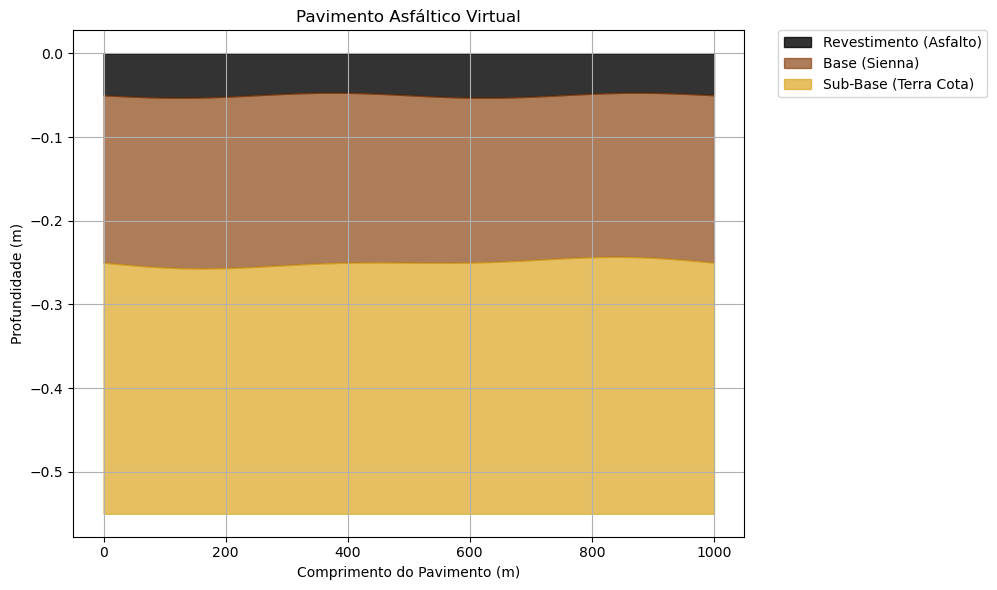

In [57]:
plt.figure(figsize=(12, 6))

#Criando as camadas
revestimento_fill = plt.fill_between(x, topo_revestimento, topo_base, 
                                     color='black', 
                                     alpha=0.8, 
                                     label='Revestimento (Asfalto)')

base_fill = plt.fill_between(x, topo_base, topo_sub_base, 
                             color='#8B4513', 
                             alpha=0.7, 
                             label='Base (Sienna)')

sub_base_fill = plt.fill_between(x, topo_sub_base, base_subleito, 
                                 color='#DAA520', 
                                 alpha=0.7, 
                                 label='Sub-Base (Terra Cota)')

plt.xlabel('Comprimento do Pavimento (m)')
plt.ylabel('Profundidade (m)')
plt.title('Pavimento Asfáltico Virtual')


plt.legend(handles=[revestimento_fill, base_fill, sub_base_fill], 
           bbox_to_anchor=(1.05, 1), 
           loc='upper left', 
           borderaxespad=0.)

plt.grid(True)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()



# Visualizando as variações

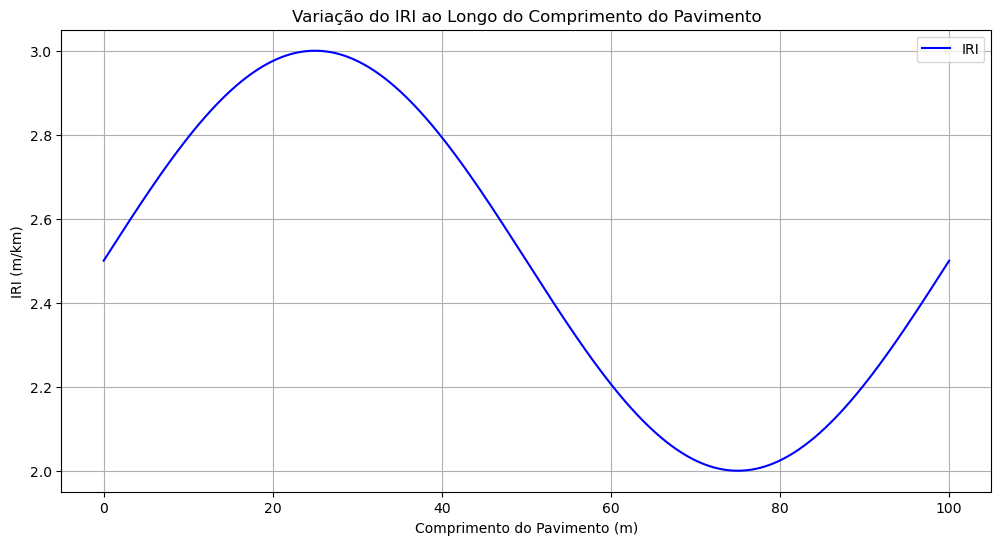

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(pavimento['comprimento'], pavimento['IRI'], color='blue', label='IRI')
plt.xlabel('Comprimento do Pavimento (m)')
plt.ylabel('IRI (m/km)')
plt.title('Variação do IRI ao Longo do Comprimento do Pavimento')
plt.legend()
plt.grid(True)
plt.show()

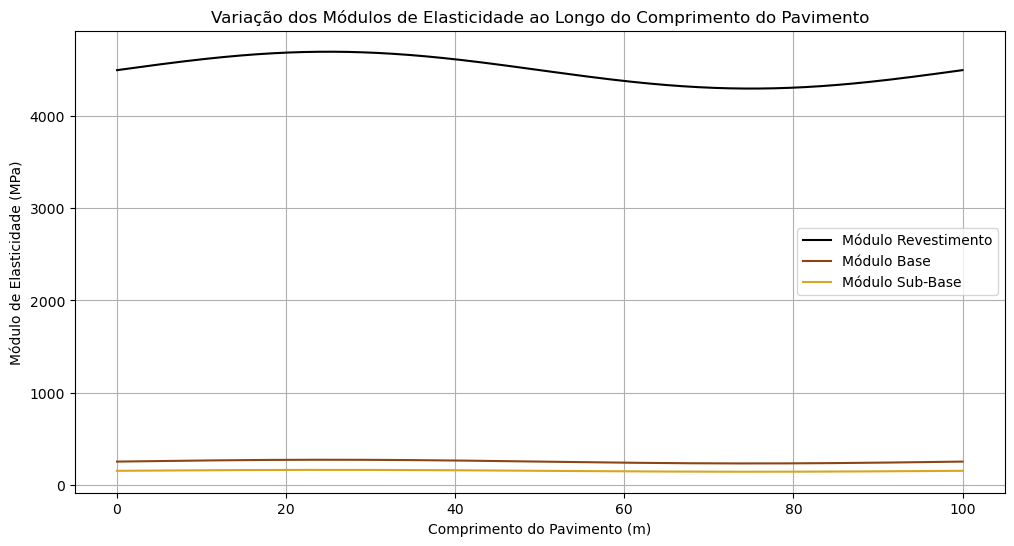

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(pavimento['comprimento'], pavimento['camadas']['revestimento']['modulo'], color='black', label='Módulo Revestimento')
plt.plot(pavimento['comprimento'], pavimento['camadas']['base']['modulo'], color='#8B4513', label='Módulo Base')
plt.plot(pavimento['comprimento'], pavimento['camadas']['sub_base']['modulo'], color='#DAA520', label='Módulo Sub-Base')
plt.xlabel('Comprimento do Pavimento (m)')
plt.ylabel('Módulo de Elasticidade (MPa)')
plt.title('Variação dos Módulos de Elasticidade ao Longo do Comprimento do Pavimento')
plt.legend()
plt.grid(True)
plt.show()

# Fazendo coletas

In [58]:
def realizar_coletas(pavimento, num_coletas):
    posicoes_coletas = np.linspace(0, len(pavimento['comprimento']) - 1, num_coletas, dtype=int)

    # Coletando valores de IRI e módulos nas posições especificadas
    coletas_IRI = pavimento['IRI'][posicoes_coletas]
    coletas_modulo_revestimento = pavimento['camadas']['revestimento']['modulo'][posicoes_coletas]
    coletas_modulo_base = pavimento['camadas']['base']['modulo'][posicoes_coletas]
    coletas_modulo_sub_base = pavimento['camadas']['sub_base']['modulo'][posicoes_coletas]

    # Visualização 1: Comparação entre o IRI contínuo e os valores coletados
    plt.figure(figsize=(12, 6))
    plt.plot(pavimento['comprimento'], pavimento['IRI'], color='blue', label='IRI Contínuo')
    plt.scatter(pavimento['comprimento'][posicoes_coletas], coletas_IRI, color='red', label='Coletas de IRI')
    plt.xlabel('Comprimento do Pavimento (m)')
    plt.ylabel('IRI (m/km)')
    plt.title(f'Comparação do IRI Contínuo com Coletas (n={num_coletas})')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Visualização 2: Comparação entre o Módulo de Elasticidade do Revestimento contínuo e os valores coletados
    plt.figure(figsize=(12, 6))
    plt.plot(pavimento['comprimento'], pavimento['camadas']['revestimento']['modulo'], color='black', label='Módulo Revestimento Contínuo')
    plt.scatter(pavimento['comprimento'][posicoes_coletas], coletas_modulo_revestimento, color='red', label='Coletas Módulo Revestimento')
    plt.xlabel('Comprimento do Pavimento (m)')
    plt.ylabel('Módulo de Elasticidade (MPa)')
    plt.title(f'Comparação do Módulo de Elasticidade do Revestimento Contínuo com Coletas (n={num_coletas})')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Visualização 3: Comparação dos Módulos de Elasticidade das Camadas com as Coletas
    plt.figure(figsize=(12, 6))
    plt.plot(pavimento['comprimento'], pavimento['camadas']['revestimento']['modulo'], color='black', label='Módulo Revestimento Contínuo')
    plt.plot(pavimento['comprimento'], pavimento['camadas']['base']['modulo'], color='#8B4513', label='Módulo Base Contínuo')
    plt.plot(pavimento['comprimento'], pavimento['camadas']['sub_base']['modulo'], color='#DAA520', label='Módulo Sub-Base Contínuo')
    plt.scatter(pavimento['comprimento'][posicoes_coletas], coletas_modulo_revestimento, color='red', label='Coletas Módulo Revestimento')
    plt.scatter(pavimento['comprimento'][posicoes_coletas], coletas_modulo_base, color='green', label='Coletas Módulo Base')
    plt.scatter(pavimento['comprimento'][posicoes_coletas], coletas_modulo_sub_base, color='orange', label='Coletas Módulo Sub-Base')
    plt.xlabel('Comprimento do Pavimento (m)')
    plt.ylabel('Módulo de Elasticidade (MPa)')
    plt.title(f'Comparação dos Módulos de Elasticidade Contínuos com Coletas (n={num_coletas})')
    plt.legend()
    plt.grid(True)
    plt.show()


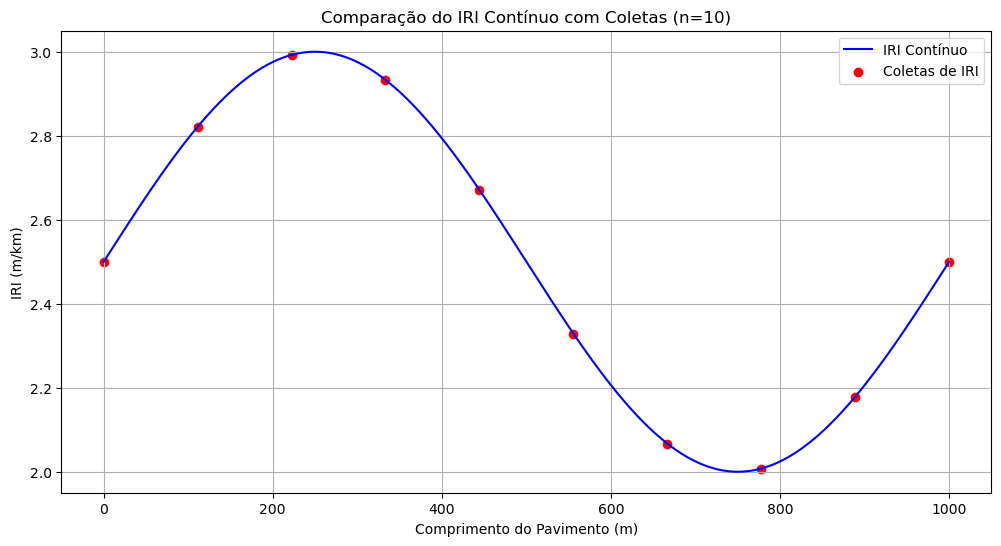

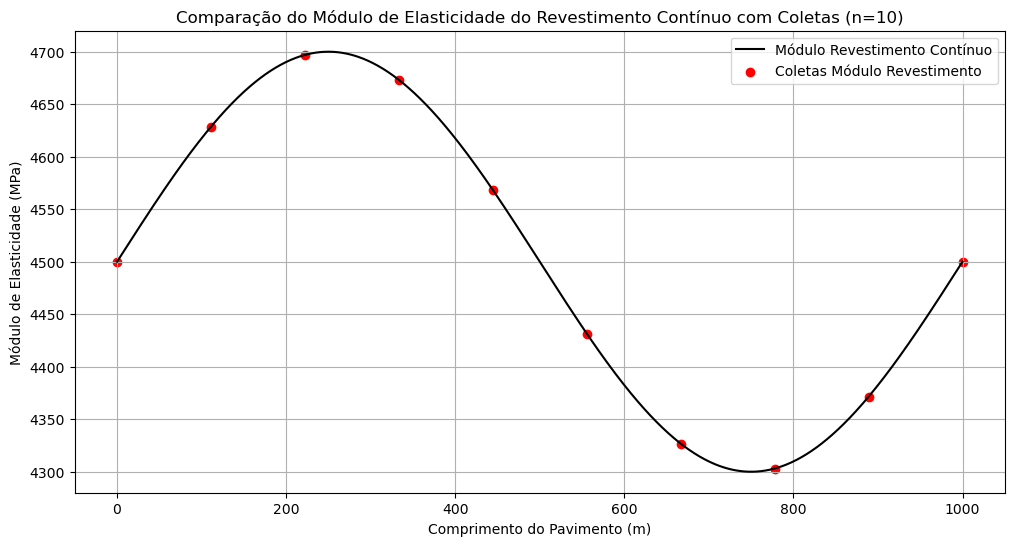

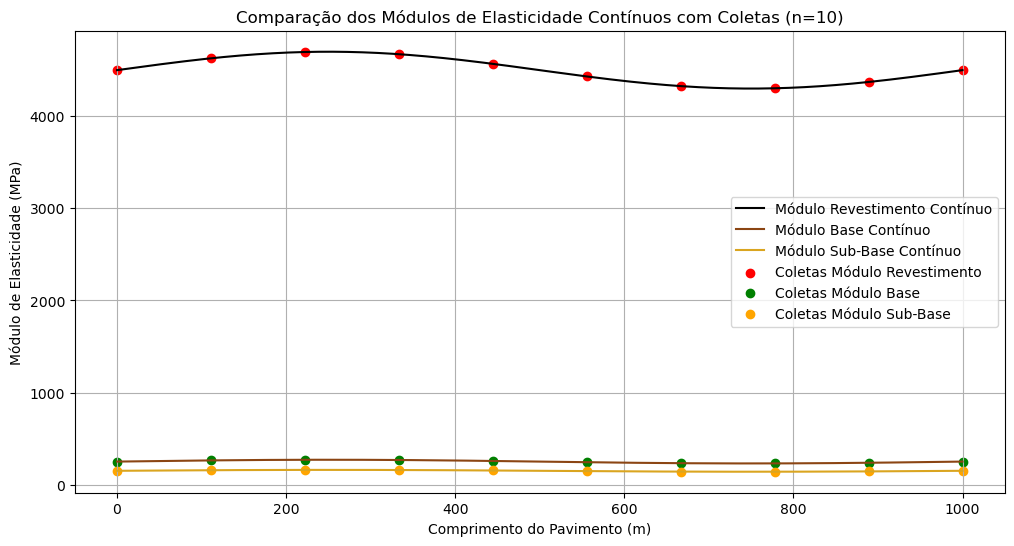

In [59]:
# Exemplo de uso da função de coleta
realizar_coletas(pavimento, num_coletas=10)